In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os, sys, shutil, math, h5py

In [2]:
HOUSEHOLD_INPUT_PATH = r'H:\Tableau\HHSurvey2017'
MODEL_INPUT_PATH = r'U:\angela\job_housing\soundcast_2050\job_housing_commute\final_set'

In [3]:
#hh_weight = pd.read_csv(os.path.join(HOUSEHOLD_INPUT_PATH,r'PSRC_Weights_Delivered_06132018_hh.csv'))
hh = pd.read_csv(os.path.join(HOUSEHOLD_INPUT_PATH, r'published_survey_2017\2017-pr2-1-household.csv'))
trip = pd.read_csv(os.path.join(HOUSEHOLD_INPUT_PATH, r'published_survey_2017\2017-pr2-5-trip.csv'))
person = pd.read_csv(os.path.join(HOUSEHOLD_INPUT_PATH, r'published_survey_2017\2017-pr2-2-person.csv'))

C:\Users\Angela\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (17,18,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,68,69,80,91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
my_trip = trip[['hhid', 'personid', 'pernum', 'tripid', 'hhgroup', 'nwkdays','trip_path_distance',
                'depart_time_mam', 'arrival_time_mam', 'google_duration', 'origin_purpose', 'dest_purpose', 
                'mode_1', 'travelers_hh', 'travelers_nonhh', 'travelers_total', 'dayofweek', 'o_taz2010', 'd_taz2010', 
                'hh_day_wt_revised', 'trip_weight_revised']]

In [5]:
my_trip['hbw_trips'] = 0
my_trip.ix[(((my_trip['origin_purpose']==1) & (my_trip['dest_purpose']==11)) | ((my_trip['origin_purpose']==1) & (my_trip['dest_purpose']==12)) | ((my_trip['origin_purpose']==1) & (my_trip['dest_purpose']==14))  ),'hbw_trips']= 1

C:\Users\Angela\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Angela\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [56]:
walk = my_trip[my_trip['mode_1']==1]

In [57]:
walk['trip_path_distance'] = pd.to_numeric(hbw['trip_path_distance'], errors='raise')
walk['trip_path_distance_wt'] = walk['trip_path_distance'] * walk['trip_weight_revised']

C:\Users\Angela\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Angela\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [58]:
walk[['trip_path_distance', 'trip_weight_revised',  'trip_path_distance_wt']].head()

,trip_path_distance,trip_weight_revised,trip_path_distance_wt
8,0.54,26.224981,14.16149
9,NaN,26.224981,NaN
12,NaN,26.224981,NaN
13,NaN,26.224981,NaN
18,NaN,26.224981,NaN


In [61]:
walk = walk.dropna(subset=['trip_path_distance']) 
# Have to drop nan value, or the average distance in total would be weird after the weight

In [69]:
walk[['trip_path_distance']].mean()

trip_path_distance    0.808966
dtype: float64

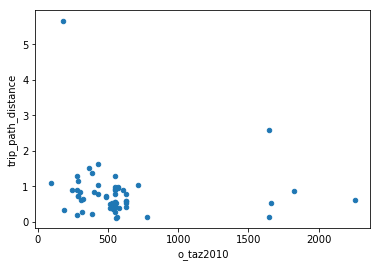

In [68]:
walk.plot(kind="scatter", x='o_taz2010', y='trip_path_distance')

In [63]:
walk['trip_path_distance_wt'].sum()/walk['trip_weight_revised'].sum()

0.7931775772287484

In [65]:
walk_df = walk.groupby(['o_taz2010']).sum().reset_index(False)

In [66]:
walk_df['dist'] = walk_df['trip_path_distance_wt']/walk_df['trip_weight_revised']

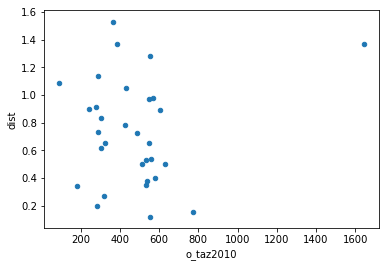

In [67]:
walk_df.plot(kind="scatter", x='o_taz2010', y='dist')
#plt.axis([0, 4000, 0, 0.1]) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EEE9438>]], dtype=object)

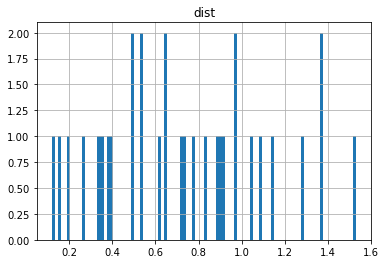

In [71]:
walk_df[['dist']].hist(bins=100)

In [72]:
len(walk_df)

40

# walk trips: Home based work 

In [73]:
hbw_walk = walk_df[walk_df['hbw_trips']==1]

In [74]:
hbw_walk['trip_path_distance_wt'].sum()/hbw_walk['trip_weight_revised'].sum()

0.690438277336804

In [76]:
len(hbw_walk)

31

In [77]:
hbw_walk['trip_weight_revised'].sum()

810.5037391629999